## OLS

OLS(Ordinary Least Squares) 는 가장 기본 결정론적 선형회귀 방법으로 잔차제곱합(RSS, Residual Sum of Squares)를 최소화하는 가중치 벡터 행렬 미분으로 구하는 방법이다.



이렇게 하나의 종속변수와 하나의 독립변수 사이의 관계를 예를 들어 _주택 가격이 주택 크기로만 결정된다면 주택 크기가 커지면 가격이 높아지는 경향_ 이 있기 때문에 아래 같이 주택 가격은 주택 크기에 대해 선형(직선)의 관계로 표현할 수 있다.

<div>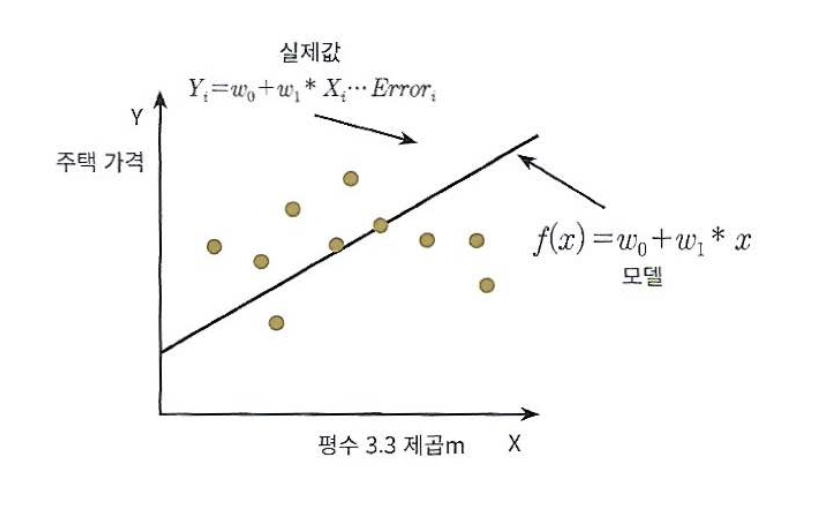</div>

크기에 대한 주택 가격을 특정 기울기와 절편을 가진 1차 함수로 표현하는 것이다. 


주택 가격 예측 함수 모델을  아래 같은 예측 모형은 상수항이 결합된 선형 모형이다.

$$
\hat{y} = Xw
$$

$\hat{y} = w_0 + w_1\cdot x$ 로 계산할 수 있다고 하자. 단순선형회귀에서 이 기울기 $w_1$ 과 절편(intercept) $w_0$ 를 회귀계수로 부른다. 




회귀모델을 이런 $\hat{y} = w_0 + w_1\cdot x$ 와 같은 1차 함수로 모델링 했다면 실제 주택 가격은 이런 1차 함수 값에서 실제 값 만큼의 오류 값을 뺀 (혹은 더한) 값 $y = w_0 + w_1\cdot x + Error\ $  이 된다. 

#### 잔차 (Residual)

실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류라해서 **_잔차(오류 값)_** 라고 부른다. **_최적의 회귀 모델을 만드는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만드는 의미_** 이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는 의미도 된다.

<p>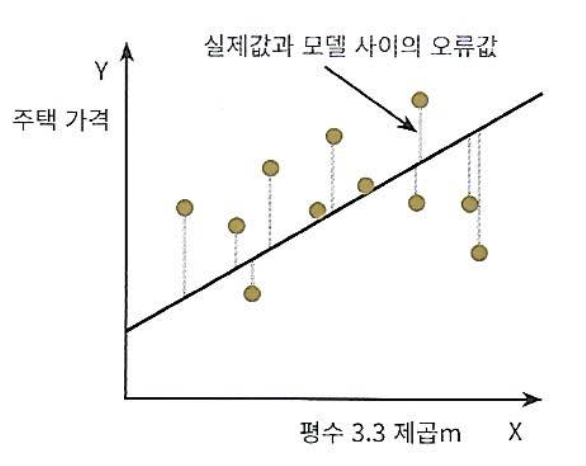</p>


어느 지점의 잔차의 벡터 e 는 다음 같다

$$
e = y - \hat{y} = y - Xw
$$

잔차의 제곱합 RSS 는

$$\begin{aligned}
RSS &= e^Te \\
&= (y - Xw)^T (y - Xw)\\
&= y^Ty - 2y^TXw + w^TX^TXw
\end{aligned}$$

잔차의 크기 즉 잔차제곱합을 가잔 작게 하는 가중치 벡터를 구하기 위해 잔차 제곱합의 그래디언트 벡터를 구하면 다음 같다:

$$
\frac{dRSS}{dw} = -2X^Ty + 2X^TXw
$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터야 하므로 다음 식이 성립한다.

$$
\frac{dRSS}{dw} = 0 \\
X^TXw^* = X^Ty
$$

만약 $X^TX$ 행렬의 역행력이 존재한다면 다음처럼 최적 가중치 벡터 $w^*$를 구할 수 있다.

$$
w^* = (X^TX)^{-1} X^T y
$$

$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면 $X^TX$ 가 양의 정부호(positive definite) 행렬이어야 한다. 만약 $X$ 가 풀랭크가 아니면 즉, $X$의 각 행렬이 서로 독립이 아니면 $X^TX$ 가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.

### 직교 방정식

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 직교 방정식(normal equation)이라고 한다.

$$
X^Ty - X^TXw = 0
$$

직교방정식을 인수 분해하면

$$
X^T(y - Xw) = 0\\
X^T e = 0
$$

모든 데이터의 d 번째 차원의 원소로 이루어진 데이터 벡터(특정 행렬의 열벡터)를 $C_d$ 라 할 때 모든 차원 d( d = 0,...,D) 에 대해서 $C_d$는 잔차 벡터 $e$와 수직을 이룬다.

$$
C_d^T e = 0 \ (d = 0,...,D)
\\\text{or}\\
C_d \bot e \ (d = 0,...,D)
$$

직교방정식으로부터 다음 같은 성질을 알 수 있다.

1. 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉 잔차의 평균은 0이다.

$$
\sum_{i=0}^N e_i = 0
$$

2. x 데이터의 평균값 $\bar{x}$ 에 대한 예측값은 y 데이터의 평균값 $\bar{y}$ 이다.

$$
\bar{y} = w^T \bar{x}
$$

1번 성질은 상수항 결합이 되어 있으면 X의 첫번째 열이 1-벡터라는 것을 이용해 증명할 수 있다.

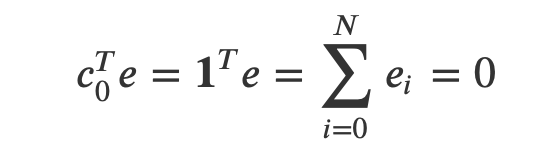

2번 성질은 다음 처럼 증명한다.


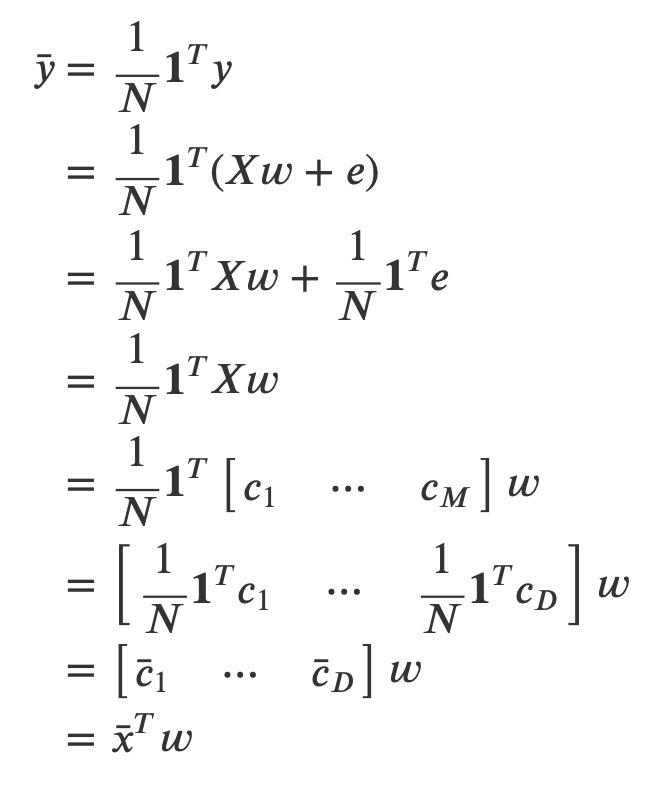

---
<br>

# 선형회귀분석 하기

NumPy 와 Scikitleanr 을 이용해 선형회귀하는 방법을 알아보자.

## NumPy 이용 선형회귀 분석

OLS 방법으로 선형회귀 분석을 해보자

In [8]:
bias = 100 #편중
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones((X0.shape[0],1)), X0])
print("X 상수항 추가:\n",
     X[:5],
     "\ny:\n",
     y[:5],
     "\n w:\n",
     w
)

X 상수항 추가:
 [[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]] 
y:
 [127.87901739  93.03291422 161.8575084  141.69205026 283.26011945] 
 w:
 86.44794300545998


In [9]:
y = y.reshape(y.shape[0],1) #y.reshape(len(y),1)

make_regression 으로 생성한 회귀모형의 식은 편중, 독립변수, 종속변수 및 회귀계수를 포함해 아래 같은 관계를 갖는다.

$$
y = 100 + 86.4479 x + \epsilon
$$

위에서 구한 수식을 이용해 선형회귀 계수를 추정하면

In [10]:
# OLS 해를 직접 이용하면
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

이것은 아래 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 99.79150869 + 86.96171201 x
$$

이 결과에서 선형회귀를 통해 구한 결과는 실제(자연법칙)와 비슷하지만 정확하지는 않다는 점이다.

In [11]:
# lstsq 이용
w = np.linalg.lstsq(X, y, rcond=-1)[0]
w

array([[99.79150869],
       [86.96171201]])

다음은 여러가지 새로운 $\hat{x}$ 값에 대해 $\hat{y}$ 를 구해본 결과를 원래 데이터와 비교한 것이다.

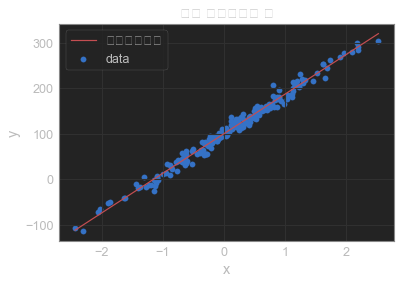

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


x_new = np.linspace(np.min(X0), np.max(X0), 100)
x_new = x_new.reshape(x_new.shape[0],-1)
X_new = np.hstack([np.ones((x_new.shape[0],1)), x_new]) #상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='data')
plt.plot(x_new, y_new, 'r-', label='회귀분석결과')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

---

## Scikit-learn 이용 선형회귀 분석

scikit-learn의 LinearRegression 으로 분석해 보자. 사이킷런의 linear_models 에서 선형 회귀를 구현한 LinearRegerssion 을 이용해 예측 회귀를 구현해 보자,
- 사이킷런의 다양한 선형모델 [linear_models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조.

LinearRegression은 예측값과 실제값의 RSS를 최소화해 OLS(Ordianry Least Squares) 추정 방식으로 구현한 클래스이다.

> OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 커져 오류에 매우 민감한다. 이런 현상을 다중 공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 매우 많은 피처가 다중공선성 문제를 가지고 있다면 PCA를 통해서 차원 축소를 수행하는 것도 고려할 수 있다.


### `linear_model.LinearRegression()`


LinearRegression 원형이다.

```python
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
```
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression




다음 같은 입력 파라미터가 주로 쓰인다:

- fit_intercept: 기본 True. 절편(Intercept)를 계산할지 말지 여부로 상수항이 없으면 False
- normalize: 기본 False. fit_intercpet=False 인 경우 무시된다. 만약 True면 회귀를 수행전에 입력 데이터 세트를 정규화 한다.


##### fit() 메서드:

모형 추정. 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

```python
model = model.fit(X,y)
```

회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 

 - coef_ : 추정된 가중치 벡터
 - intercept_: 추정된 상수항(절편 값).

##### predict() 메서드:

새로운 입력 데이터에 대해 출력 데이터를 예측한다.

```python
y_new = model.predcit(x_new)
```

앞의 numPy 예제를 LinearRgression 클래스로 선형호귀를 하면

In [31]:
from sklearn.linear_model import LinearRegression

lg_clf = LinearRegression()
model = lg_clf.fit(X0, y)
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


이제 predict() 메서드로 새로운 $X_new$ 에 대응하는 y 값을 예측할 수 있다. 차원이 있어야 하므로 2차원 데이터를 상요한다.

In [32]:
lg_clf.predict([[3]]) # or model.predict([[3]])

array([[360.67664473]])

---

## Scikilearn 으로 보스턴 주택가격 데이터 회귀분석



In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
lg_clf = LinearRegression()
model = lg_clf.fit(boston.data, boston.target)

완성된 모델에서 추정한 가중치 값을 보면 방(RM)이 하나 증가하면 가격 예측치는 3810 달러 증가한다는 것을 알수 있다.

In [36]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [37]:
model.intercept_

36.459488385089855

In [39]:
pred = model.predict(boston.data)

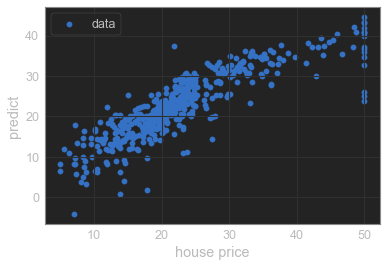

In [40]:
plt.scatter(boston.target, pred, label='data')
plt.xlabel('house price')
plt.ylabel('predict')
# plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

---

## statmodels 패키지로 선형회귀 분석

statmodels.OLS 클래스로 선형회귀 분석을 한다.

> statemodel은 [statemodel 패키지 소개](https://datascienceschool.net/view-notebook/77ee0e1bb6754ad89e0da14c6d461953/) 참조

```sh
$ conda install statsmodels
```

### OLS 클래스 사용

다음 같이 OLS 에 데이터를 제공하고 자동으로 상수항이 만들어지지 않기 때문에 `add_constant()` 메서드로 상수항을 추가해 주어야 한다.

```python
model = OLS(y, X) #순서 주의!
```

`fit()` 메서드로 모형을 추정한다. 결과는 RegressionResult 객체로 반환한다.

```python
result = model.fit()
```

RegressionResult 클래스 객체는 결과 보고용 summary 메서드와 예측을 위한 predction 메서드를 제공한다.

```python
result.summary()
y_new = result.predcit(x_new)
```

예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해주어야 한다.

In [41]:
bias = 100 #편중
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones((X0.shape[0],1)), X0])

In [42]:
y = y.reshape(y.shape[0],1) #y.reshape(len(y),1)

OLS 객체로 모형의 결과는 확률적 회귀모형에 자세히 설명한다.

In [43]:
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):          8.17e-182
Time:                        16:42:25   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

predcit 로 새 $X_{new}$ 값에 대응하는 y 값을 예측해 본다.

In [44]:
result.predict([[1,3]])

array([360.67664473])

보스턴 집값 데이터를 OLS 로 분석한 결과를 보자

In [45]:
import pandas as pd

X0_df = pd.DataFrame(boston.data, columns=boston.feature_names)
X_df = sm.add_constant(X0_df)
y_df = pd.DataFrame(boston.target, columns=['MEDV'])

In [46]:
model = sm.OLS(y_df, X_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 May 2020   Prob (F-statistic):          6.72e-135
Time:                        17:40:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

예측할 때는 입력 데이터가 추정 모형과 동일한 형태여야 한다. 아래 같은 데이터를 고려해 보자

In [66]:
x_new = X0_df.mean().values
x_new

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

predict() 시 예측할 데이터는 회귀분석에 사용하는  상수항을 추가한 X 데이터와 동일한 형태여야 한다. 여기에서 알기 쉽게 데이터프레임의 형태로 만들었다. 데이터프레임을 만들 때 데이터 행이 하나인 경우에는 `add_constant()` 에 has_constant="add" 인수를 추가해야 한다.

In [68]:
x1_df = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T,
                                     columns=boston.feature_names),
                          has_constant="add")
x1_df.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [69]:
result.predict(x1_df)

0    22.532806
dtype: float64

위 예측 값은 직교방정식에서 증명했던 것 처럼 y 데이터의 평균과 같다.

In [71]:
y_df.mean()

MEDV    22.532806
dtype: float64

RegerssionResults 클래스는 분석 결과를 다양한 속성에 저장해 준다. 자주 사용하는 속성은
  - params: 가중치 벡터
  - resid: 잔차 벡터

In [72]:
result.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

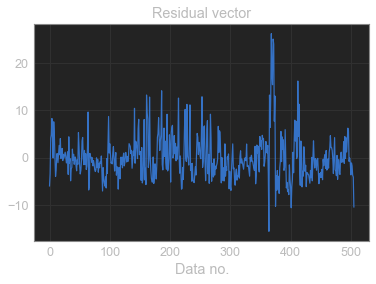

In [73]:
result.resid.plot()
plt.title('Residual vector')
plt.xlabel('Data no.')
plt.show()

직교방정식에서 이끌어 낸 것 처럼 잔차의 합은 0이 된다.

In [74]:
result.resid.sum()

3.247180302423658e-12

---

임의의 데이터...

In [58]:
x_new = np.random.rand(14)
x_new

array([0.08730786, 0.3315657 , 0.87724544, 0.90877316, 0.35333331,
       0.00314963, 0.07803872, 0.21296688, 0.97321465, 0.84760223,
       0.12974859, 0.19139368, 0.84628446, 0.01894364])

In [59]:
result.predict(x_new)

array([3.03496536])

---

<br>

# 사이킷런 LinearRegression 이용 보스턴 주택 가격 예측

사이킷런의 linear_models 에서 선형 회귀를 구현한 LinearRegerssion 을 이용해 보스턴 주택 가격 예측 회귀를 구현해 보자,
- 사이킷런의 다양한 선형모델 [linear_models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조.

## `linear_model.LinearRegression()`

LinearRegression은 예측값과 실제값의 RSS를 최소화해 OLS(Ordianry Least Squares) 추정 방식으로 구현한 클래스이다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

> OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 커져 오류에 매우 민감한다. 이런 현상을 다중 공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 매우 많은 피처가 다중공선성 문제를 가지고 있다면 PCA를 통해서 차원 축소를 수행하는 것도 고려할 수 있다.


LinearRegression 원형이다.

```python
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
```
다음 같은 입력 파라미터가 주로 쓰인다:

- fit_intercept: 기본 True. 절편(Intercept)를 계산할지 말지 여부.
- normalize: 기본 False. fit_intercpet=False 인 경우 무시된다. 만약 True면 회귀를 수행전에 입력 데이터 세트를 정규화 한다.

결과 객체는 다음 속성과 함수을 사용한다.:
- fit(X,y) 입력 데이터
 - coef_ : fit() 수행시 회귀계수 W가 저장된 속성으로 shape 는 (target 값 개수, 피처 개수)
 - intercept_: 절편 값.

다음으로 예측된 회귀 모델을 평가하는 방법을 알아보자,

### 사이킷런 회귀 평가 지표

회귀 평가는 실제 값과 예측 값의 차이를 절대 값 평균 혹은 제곱 혹은 제곱의 루트를 씌운 평균값 등으로 구한다. 일반적으로 회귀의 성능을 평가하는 지표는 다음 같다:

평가지표 | 설명 | 수식
------- | ------------------------- | ------------------
**MAE** | ( Mean Absolute Error) 실제값과 예측값 차이를 절대값으로 변환해 평균 | $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| Y_i - \hat{Y}_i \right| $$
**MSE** | ( Mean Squared Error) 실제값과 예측값 차이를 제곱해 평균 | $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2 $$
**RMSE** | Root Mean Squared Error. MSE에 루트 | $$ MSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2} $$
**$R^2$** | 분산 기반으로 예측 성능을 평가. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울 수록 예측 정확도가 높다 | $$ R^2 = \frac{예측값\ Variance}{실제값\ Variance}$$

이밖에도 MSE, RMSE에 로그를 적용한 MSLE(Mean Squared Log Error) 와 RMSLE( Root Mean Squared Log Error) 도 사용한다.

사이킷런은 RMSE 를 제공하지 낳는다. MSE에 제곱근을 씌워 계산해야 한다. 


다음은 각 평가 방법에 대한 사이킷런의 API 및 `cross_val_score()`, `GridSearchCV` 에서 평가시 사용하는 `scoring=` 파라미터의 적용값이다.

평가방법 | 사이킷런 평가 지표 API | Scoring 함수 적용 값
-------- | --------------------------------- | ------------
MAE | metrics.mean_absolute_error | neg_mean_absolute_error
MSE | metrics.mean_squared_error | neg_mean_squared_error
R^2 | metrics.r2_score | r2

위 MAE의 scoring 파라미터 값에 neg_ 란 접두사가 있다. 이것은 음수 Negative 값을 가진다는 의미로 MAE는 절대값으로 음수가 나오면 안된다. Scoring 함수에 neg_mean_absolute_error 를 적용해 음수값을 반환하는 이유는 사이킷런의 함수가 score 값이 클수록 좋은 평가 결과로 자동평가하기 때문이다. 

특히 GridSearchCV 경우 가장 좋은 evaluation 값을 가지는 하이퍼 파라미터로 Estimator를 학습까지 자동드오 시킬수 있다. 그런데 실제 값과 예측 값의 오류 차이를 기반으로하는 회귀 평가의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다.

따라서 -1을 원래의 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 만든다. 예를 들어 10 > 1 이지만 음수를 곱하면 -1 > -10 이 되는 것이다. metrics.mean_absolute_error() 같은 API는 정상적으로 양수 값을 반환한다. 하지만 Scoring 함수의 scoring 파라미터값 neg_mean_absolute_error 이 의미하는 것은 -1 * metrics.mean_absolute_error() 라는 것이다.

---

## 보스턴 주택 가격 구현

내장된 보스턴 주택 가격 데이터를 이용해서 선형 회귀 모델을 만들어 보자.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()# boston 데이타셋 로드

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 

In [10]:
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 주택 가격

산점도와 회귀직선을 보면 RM, LSTAT 의 PRICE 영향도가 가장 두드러 지는 것으로 보인다.
 - RM 방크기: 방의 크기가 클수록 가격이 증가하는 **양방향의 선형성(Positive linearity)**를 보인다.
 - LSTAT 하위계측 비율: LSTAT이 적을수록 PRICE가 증가하는 **음 방향의 선형성**을 보인다.

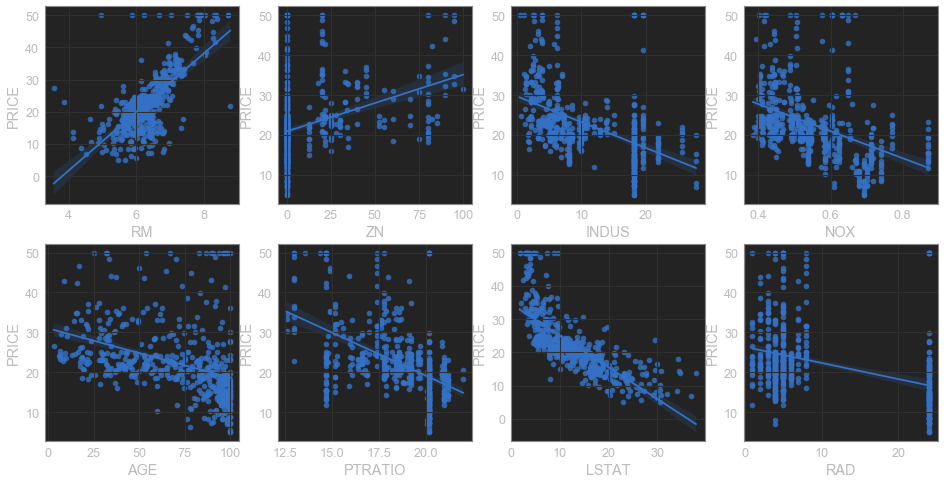

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

### 선형모델 만들기

LinearRgression으로 보스턴 주택 가격의 회귀 모델을 만들어보자.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)
X_train.shape, y_train.shape

((354, 13), (354,))

In [19]:
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


주택가격 모델의 절편(intercept)과 회귀계수(coerricient)를 보자.

In [20]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


회귀계수 coef_ 에 피처 값을 매핑하고 큰 값 순서로 출력해 보면 - RM 이 양의 값으로 가장 크고, NOX 가 음 값이 너무 커 보인다.

In [21]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

최적화를 수행해 보자. 

cross_val_score() 를 이용해 교차 검증으로 MSE, RMSE를 측정해 보겠다. 
 - `scoring="neg_mean_squared_error"` 를 주면 계산된 MSE 값에 -1을 곱해서 반환하므로 -1을 다시 곱했다.
 - RMSE 를 위해 제곱근 계산과 그 평균을 추가한다.

In [22]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


5개 폴더 세트에 대한 교차검증 결과로 평균 RMSE=5.829 가 나왔다.